<a href="https://colab.research.google.com/github/ALOrlyanskii/BMSTU/blob/main/VKR_Orlyanskii_AL_4_Normaliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прогнозирование конечных свойств новых материалов (композиционных материалов). 
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. 
Актуальность: Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
Датасет состоит из двух excel-файлов: 
X_bp -  датасет со слеюущими характеристиками композитов: 
- Соотношение матрица-наполнитель;
- Плотность, кг/м3;
- модуль упругости, ГПа;
- Количество отвердителя, м.%;
- Содержание эпоксидных групп,%_2;
- Температура вспышки, С_2;
- Поверхностная плотность, г/м2;
- Модуль упругости при растяжении, ГПа;
- Прочность при растяжении, МПа;
- Потребление смолы, г/м2.
X_nup - датасет со следующими характеристиками композитов: 
- Угол нашивки, град;
- Шаг нашивки; 
- Плотность нашивки.
Строки проиндексированы, согласно постановке задачи для ВКР необходимо объединить датасеты по индексу с типом объединения INNER.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Импорт библиотек, используемых в процессе загрузки, исследования и обработки данных**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import itertools
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from scipy import stats
from keras.models import Sequential
from keras import models
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

**Загрузка исходных данных из датасетов**

In [ ]:
ds_Х_bp = pd.read_excel('/content/drive/MyDrive/VKR/X_bp.xlsx', index_col=0)
ds_X_nup = pd.read_excel('/content/drive/MyDrive/VKR/X_nup.xlsx', index_col=0)

**Исследуем загруженные датасеты**


In [ ]:
ds_Х_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Индекс                                                      
0                              1.857143            2030.0   
1                              1.857143            2030.0   
2                              1.857143            2030.0   
3                              1.857143            2030.0   
4                              2.771331            2030.0   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
Индекс                                                       
0                  738.736842                        30.00   
1                  738.736842                        50.00   
2                  738.736842                        49.90   
3                  738.736842                       129.00   
4                  753.000000                       111.86   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Индекс                                                              
0                             22.267857                100.000000   
1                             23.750000                284.615385   
2                             33.000000                284.615385   
3                             21.250000                300.000000   
4                             22.267857                284.615385   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Индекс                                                                        
0                               210.0                                  70.0   
1                               210.0                                  70.0   
2                               210.0                                  70.0   
3                               210.0                                  70.0   
4                               210.0                                  70.0   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
Индекс                                                          
0                              3000.0                    220.0  
1                              3000.0                    220.0  
2                              3000.0                    220.0  
3                              3000.0                    220.0  
4                              3000.0                    220.0

In [ ]:
ds_Х_bp.shape

(1023, 10)

In [ ]:
ds_X_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
Индекс                                                    
0                        0          4.0               57.0
1                        0          4.0               60.0
2                        0          4.0               70.0
3                        0          5.0               47.0
4                        0          5.0               57.0

In [ ]:
ds_X_nup.shape

(1040, 3)

Первый датасет содержит 1023 строки и 10 характеристик материала, Второй датасет содержит 1040 строк и 3 характеристики материала


**Объединяем датасет с типом объединения INNER**

In [ ]:
ds_X = ds_Х_bp.merge(ds_X_nup, how = 'inner', left_index=True, right_index=True)

In [ ]:
ds_X.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Индекс                                                      
0                              1.857143            2030.0   
1                              1.857143            2030.0   
2                              1.857143            2030.0   
3                              1.857143            2030.0   
4                              2.771331            2030.0   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
Индекс                                                       
0                  738.736842                        30.00   
1                  738.736842                        50.00   
2                  738.736842                        49.90   
3                  738.736842                       129.00   
4                  753.000000                       111.86   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Индекс                                                              
0                             22.267857                100.000000   
1                             23.750000                284.615385   
2                             33.000000                284.615385   
3                             21.250000                300.000000   
4                             22.267857                284.615385   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Индекс                                                                        
0                               210.0                                  70.0   
1                               210.0                                  70.0   
2                               210.0                                  70.0   
3                               210.0                                  70.0   
4                               210.0                                  70.0   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
Индекс                                                           
0                              3000.0                    220.0   
1                              3000.0                    220.0   
2                              3000.0                    220.0   
3                              3000.0                    220.0   
4                              3000.0                    220.0   

        Угол нашивки, град  Шаг нашивки  Плотность нашивки  
Индекс                                                      
0                        0          4.0               57.0  
1                        0          4.0               60.0  
2                        0          4.0               70.0  
3                        0          5.0               47.0  
4                        0          5.0               57.0

In [ ]:
ds_X.shape

(1023, 13)

В объединенном таким образом датасете осталось 1023 строки. 

In [ ]:
ds_X.to_excel('/content/drive/MyDrive/VKR/ds_X.xlsx')

**Разведочный анализ данных в объединенном датасете**
Необходимо 
-нарисовать гистограммы распределения каждой из переменной, 
-диаграммы ящика с усами, 
-попарные графики рассеяния точек. 
Необходимо также для каждой колонки 
-получить среднее, 
-медианное значение, 
-провести анализ и исключение выбросов, 
-проверить наличие пропусков.

In [ ]:
#проверка наличия пропусков в датасете#
ds_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
ds_X.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

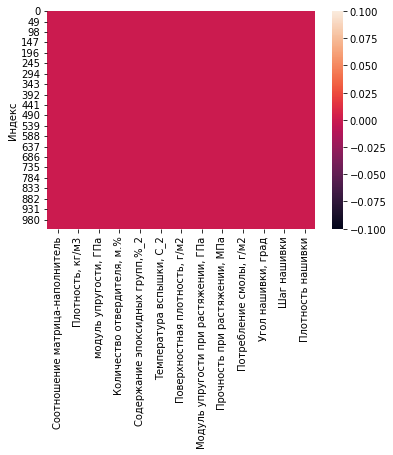

In [ ]:
sns.heatmap(ds_X.isnull())

В исследуемом датасете пропуски отсутствуют.

In [ ]:
#Для каждой колонки получаем среднее значение#
ds_X.mean(axis=0)

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [ ]:
#Для каждой колонки получаем медианное значение#
ds_X.median(axis=0)

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

**Рисуем гистограммы распределения для каждой из переменных.**

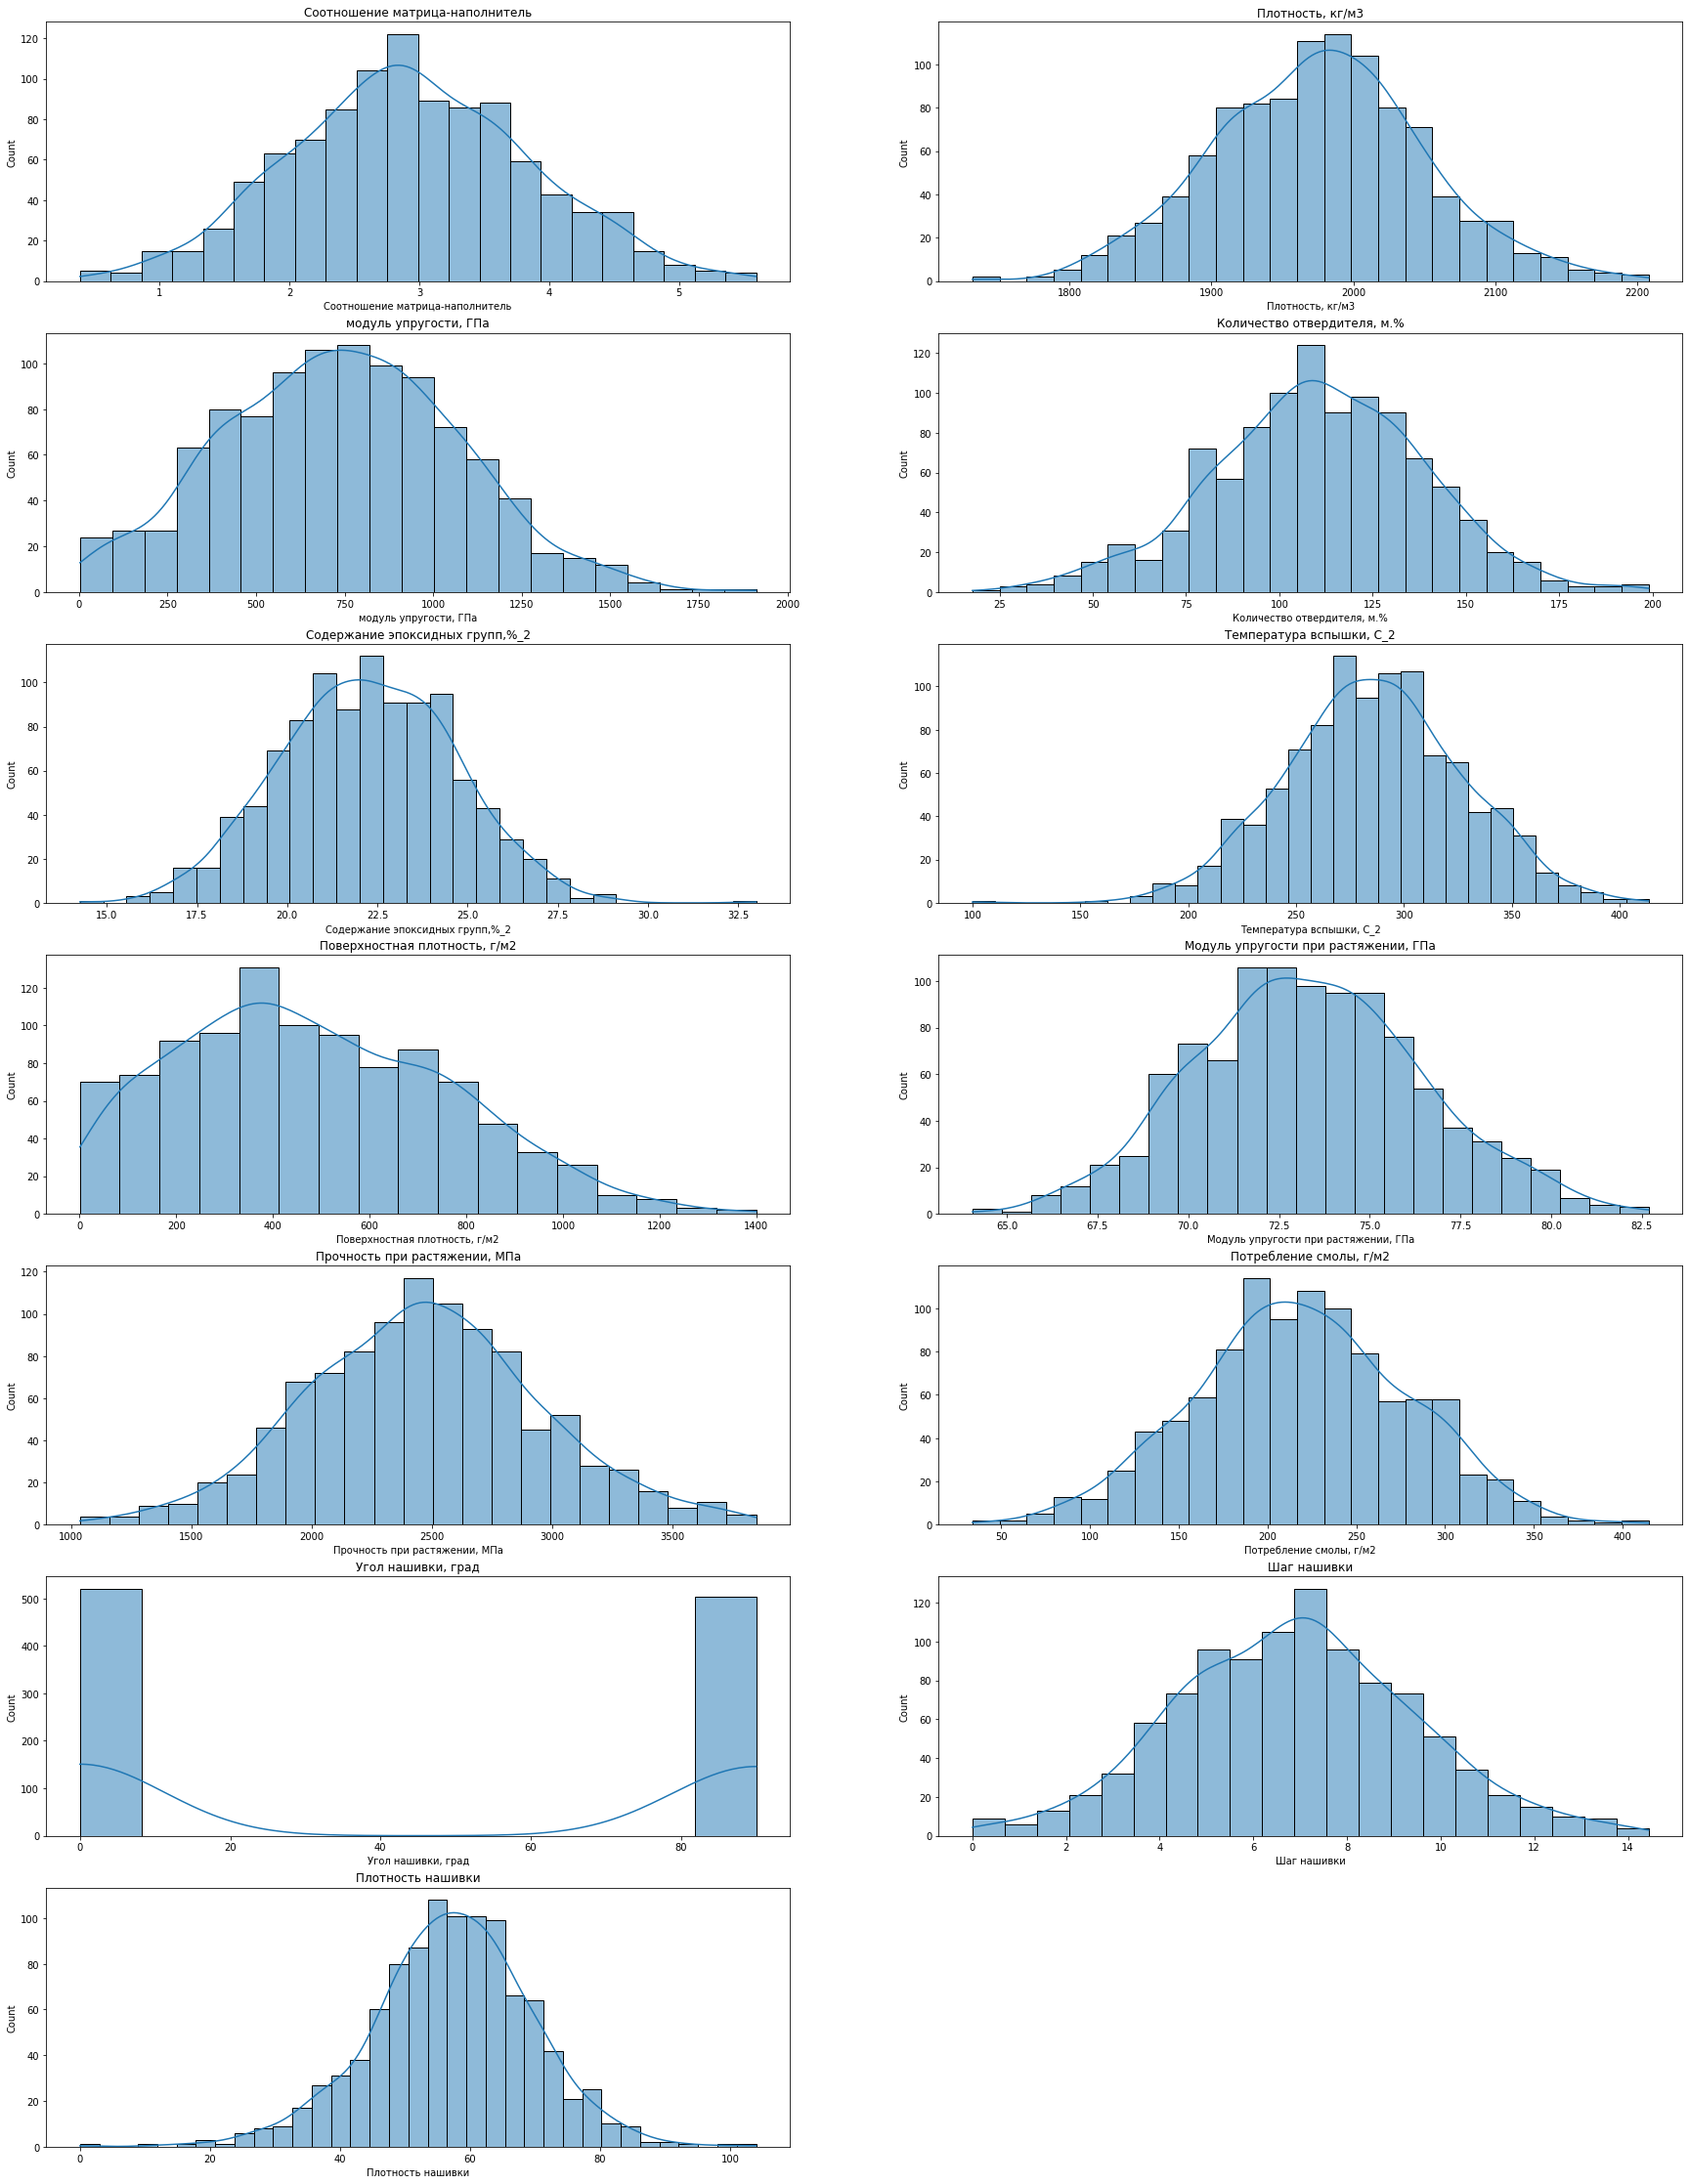

<Figure size 432x288 with 0 Axes>

In [ ]:
A = 1

fig = plt.figure(figsize=(30, 40))
for i in ds_X.columns:
    plt.subplot(7, 2, A )
    plt.title(i)
    plt.xlabel(i)
    sns.histplot(ds_X[i], kde=True)
    A = A + 1
   
plt.show()
plt.savefig(f'/content/drive/MyDrive/VKR/Gist.jpg', 
              dpi = 200, bbox_inches = 'tight', pad_inches = 0.9)

Все характеристики в датасете, кроме угла нашивки (т.к. характеристика принимает только дискретные значения 0 градусов и 90 градусов), имеют нормальное распределение

**Рисуем диаграмму ящика с усами для каждой из характеристик**

In [ ]:
def yashik (data_set):
  for column in data_set:
    plt.figure(figsize=(30,4))
   
    plt.subplot(122)
    sns.boxplot(data=data_set[column], width=0.3, palette='hot', orient='h')
    plt.xlabel(column)

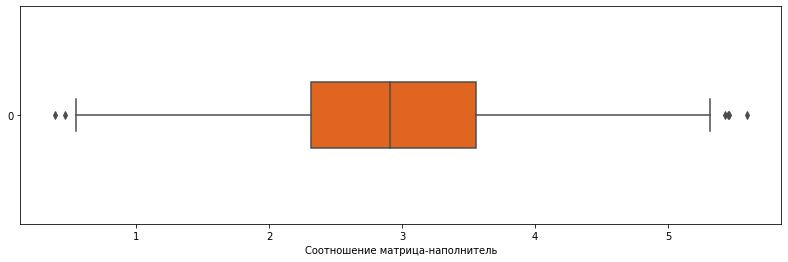

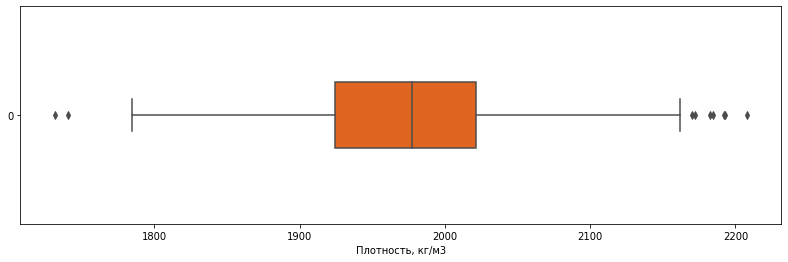

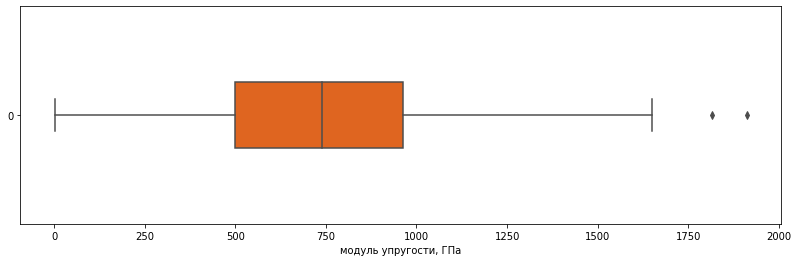

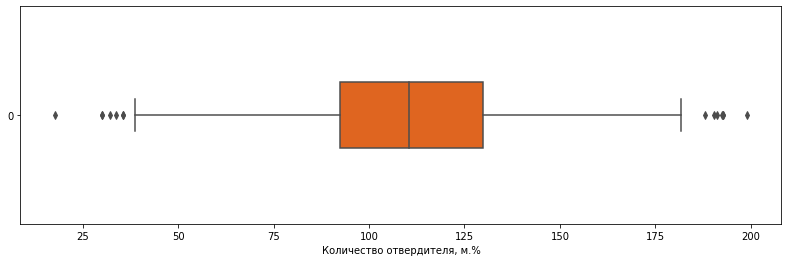

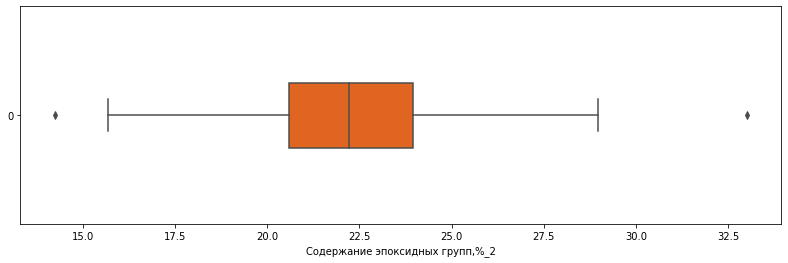

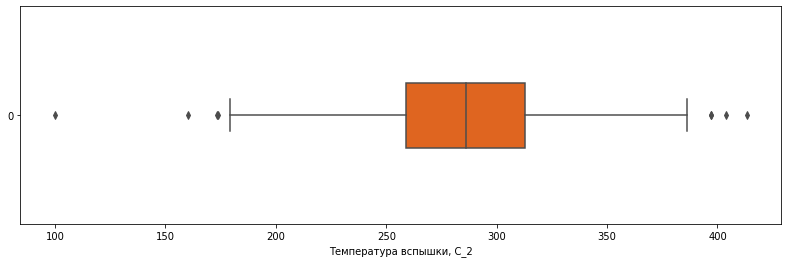

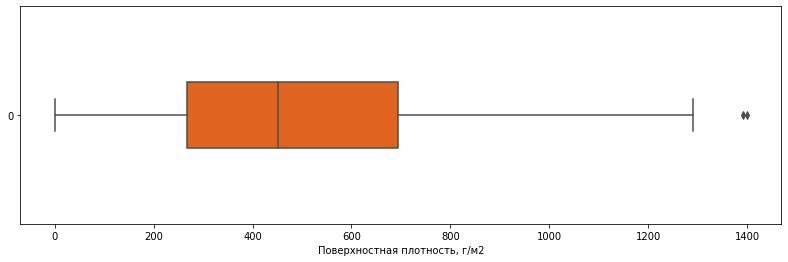

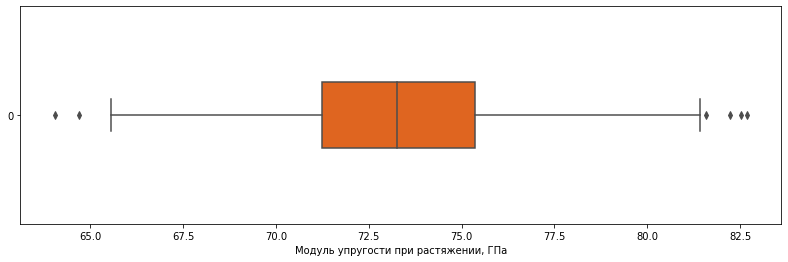

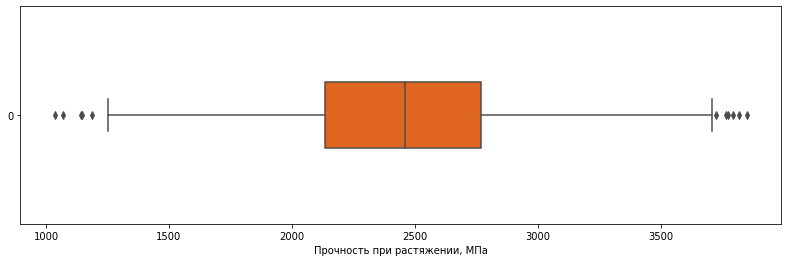

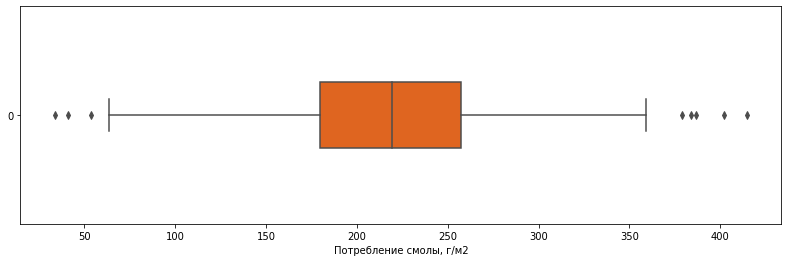

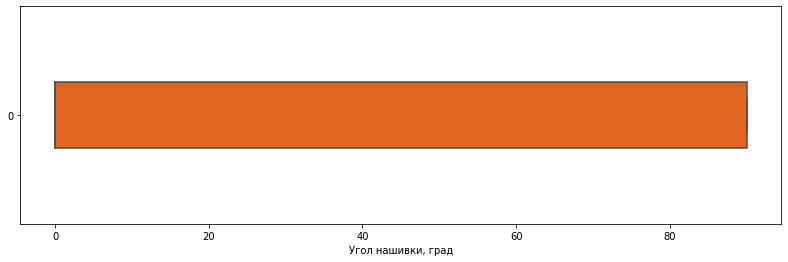

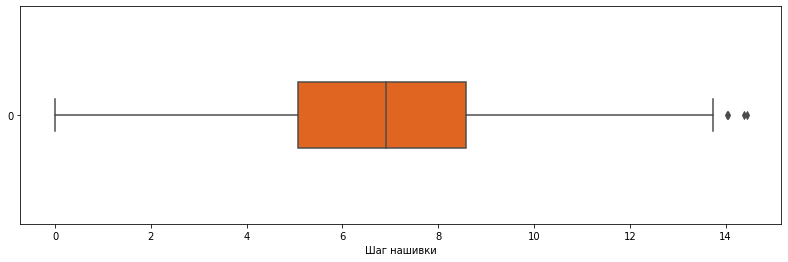

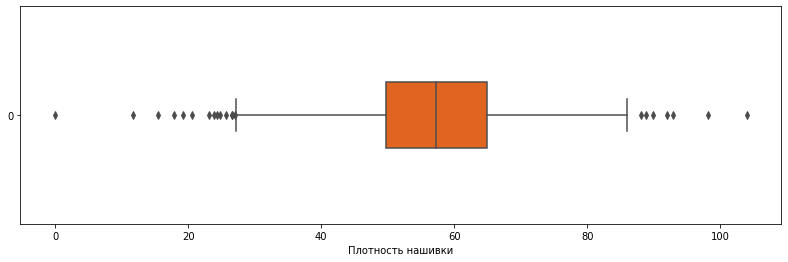

In [ ]:
yashik(ds_X)


**Рисуем попарные графики рассеяния точек**


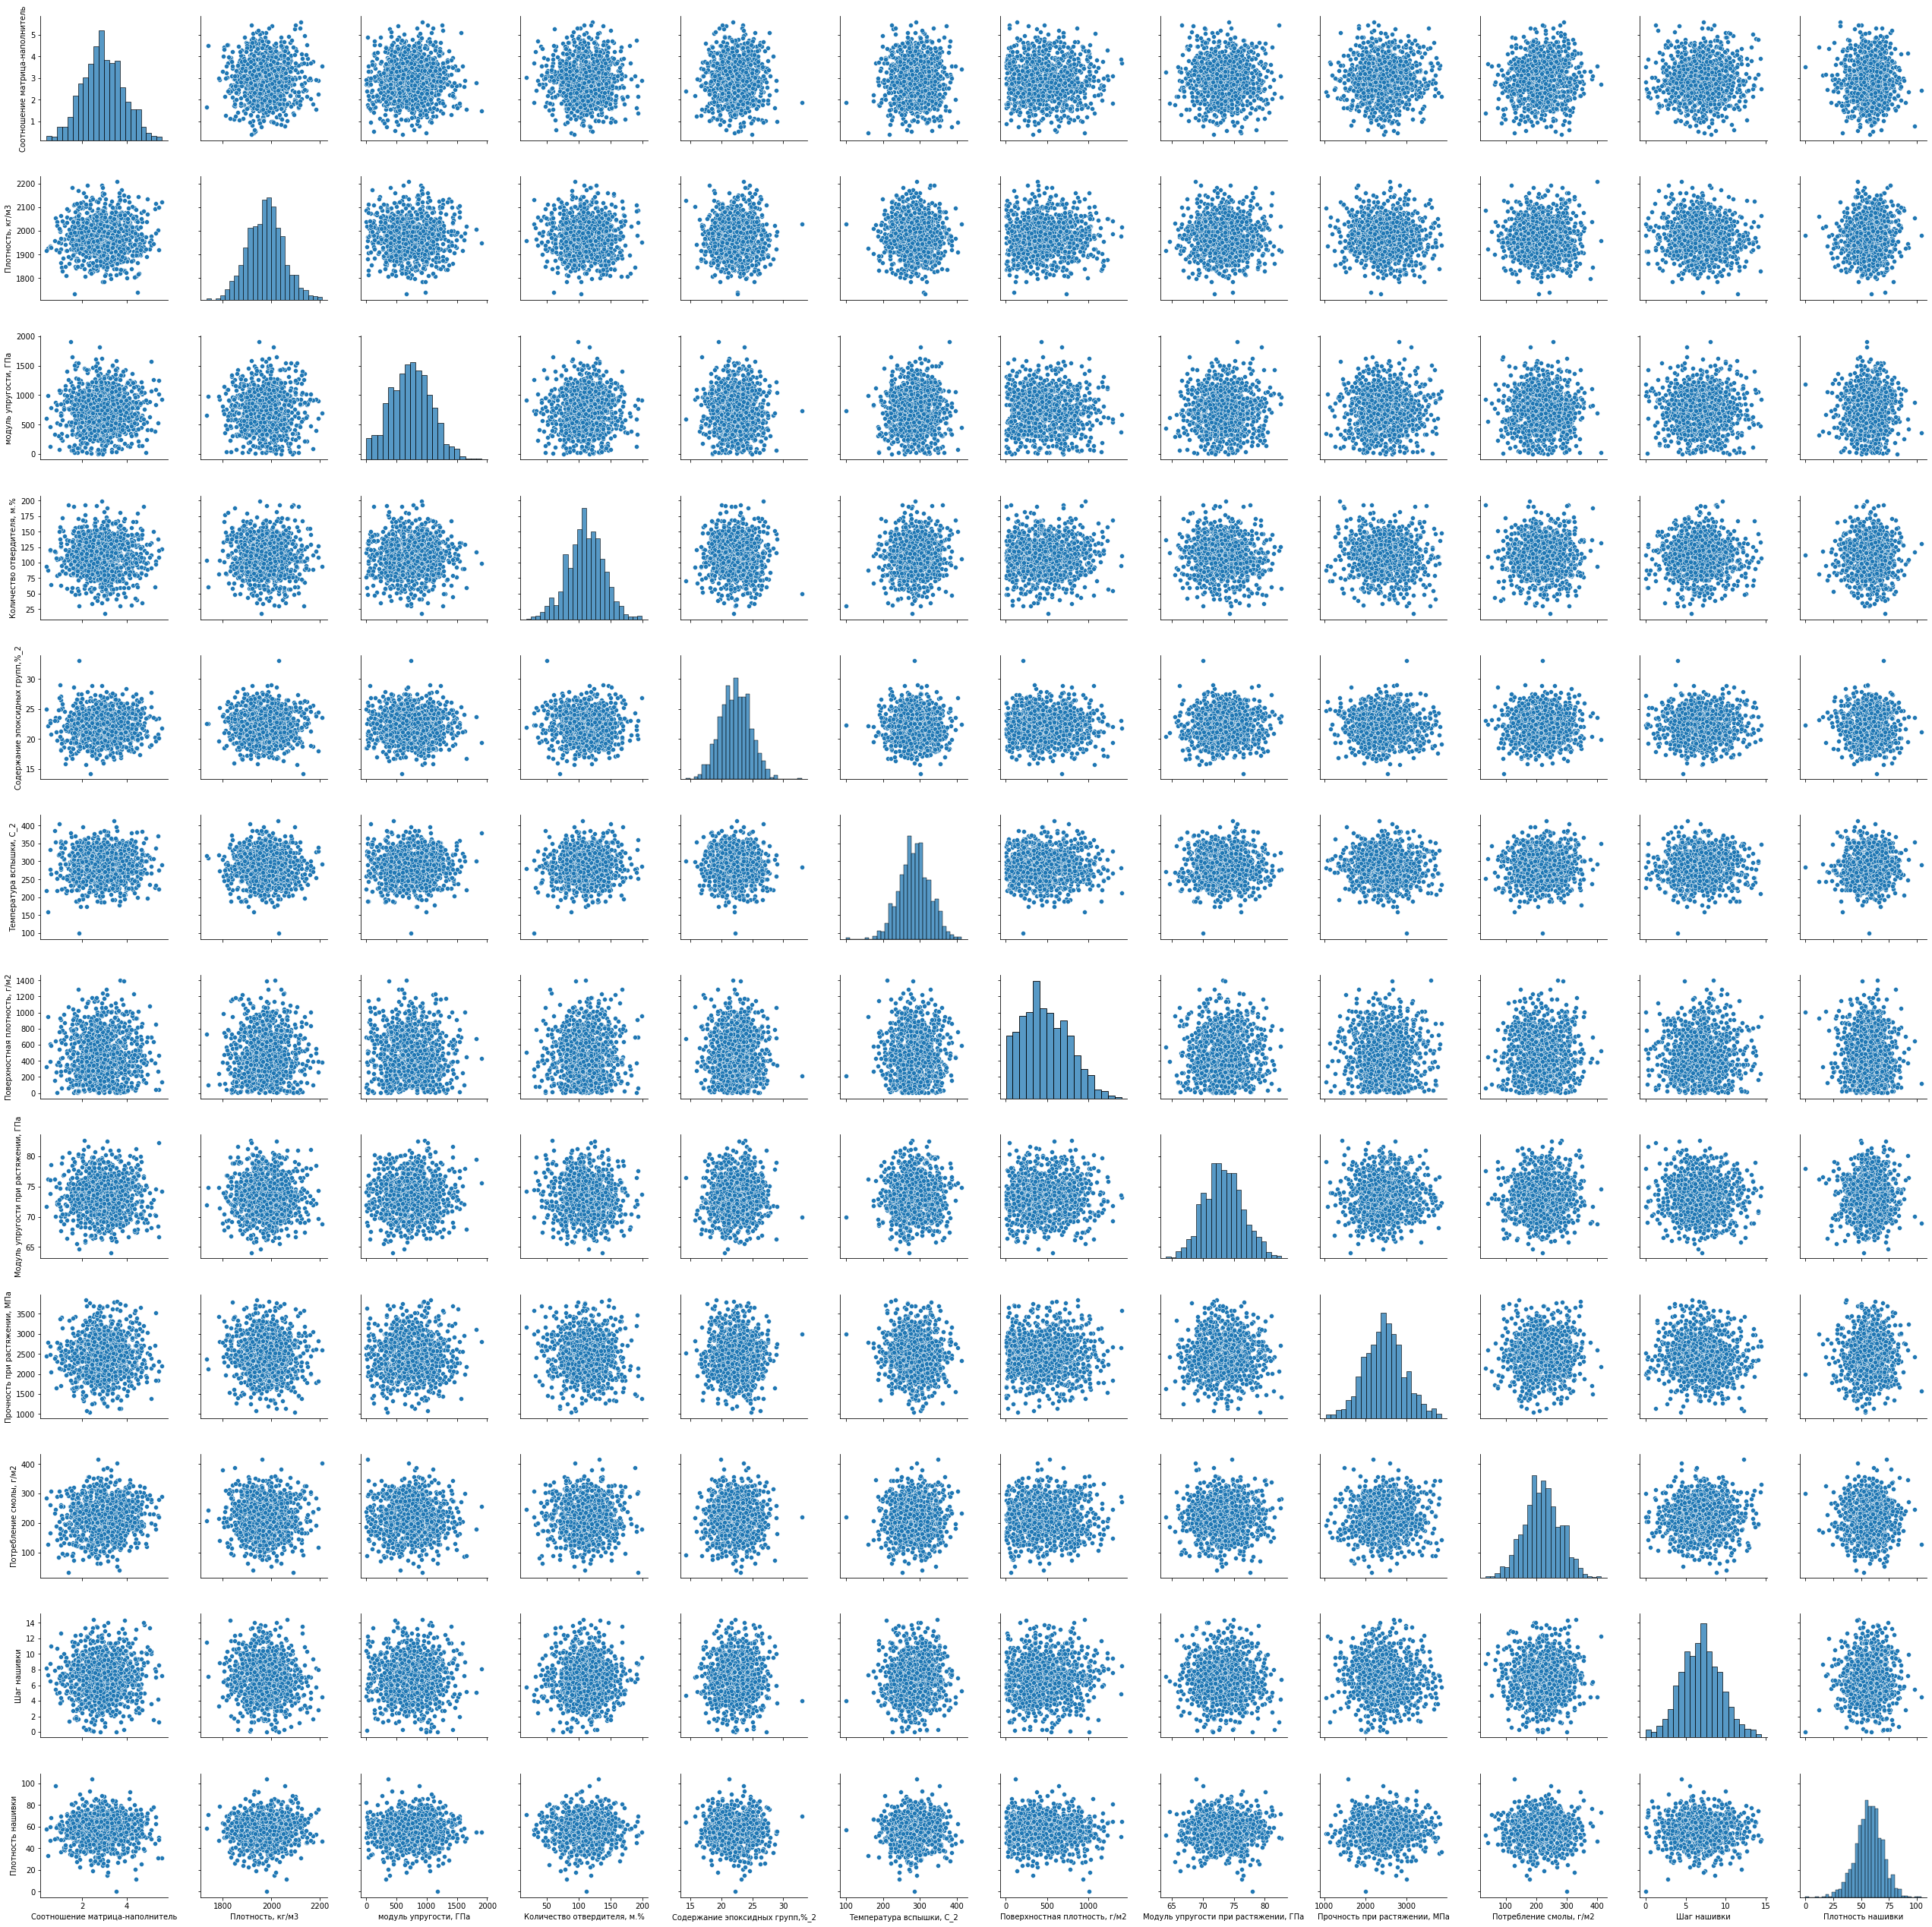

In [ ]:
sns.pairplot(ds_X[ds_X.columns].drop(labels='Угол нашивки, град',  axis = 1), height=3)
plt.savefig(f'/content/drive/MyDrive/VKR/Grafik_rass.jpg', 
              dpi = 200, bbox_inches = 'tight', pad_inches = 0.9)





Исследуем зависимость между параметрами с помощью тепловой карты

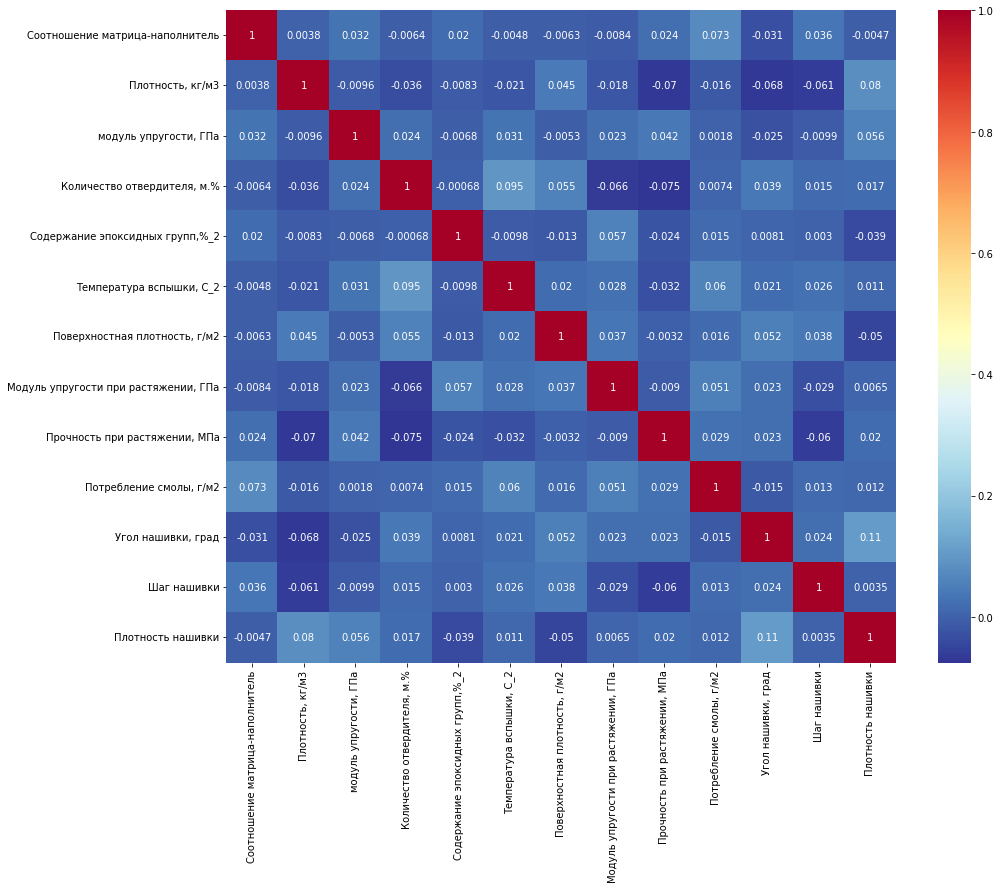

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(ds_X.corr(), cmap = 'RdYlBu_r', annot = True)

Исходя из тепловой карты прямой корелляции между исследуемыми параметрыми не имеется.

# **ПРЕДОБРАБОТКА ДАННЫХ**

**Удаляем выбросы.**


Оцениваем выбросы с применением метода трех сигм.

In [ ]:
count_v = 0
for column in ds_X:
    d = ds_X.loc[:, [column]]
    zscore = (ds_X[column] - ds_X[column].mean()) / ds_X[column].std()
    d['v'] = zscore.abs() > 3
    count_v += d['v'].sum()
    
print('Количество выбросов:', count_v)

Количество выбросов: 24


Найдем распределение выбросов по параметрам

In [ ]:
v = ds_X.copy()
for i in ds_X.columns:
    v[i] = abs((ds_X[i] - ds_X[i].mean()) / ds_X[i].std())
    print(f'количество выбросов в параметре {i} - {sum(v[i] > 3)} ')
print(f' Всего выбросов {sum(sum(v.values > 3))}')

количество выбросов в параметре Соотношение матрица-наполнитель - 0 
количество выбросов в параметре Плотность, кг/м3 - 3 
количество выбросов в параметре модуль упругости, ГПа - 2 
количество выбросов в параметре Количество отвердителя, м.% - 2 
количество выбросов в параметре Содержание эпоксидных групп,%_2 - 2 
количество выбросов в параметре Температура вспышки, С_2 - 3 
количество выбросов в параметре Поверхностная плотность, г/м2 - 2 
количество выбросов в параметре Модуль упругости при растяжении, ГПа - 0 
количество выбросов в параметре Прочность при растяжении, МПа - 0 
количество выбросов в параметре Потребление смолы, г/м2 - 3 
количество выбросов в параметре Угол нашивки, град - 0 
количество выбросов в параметре Шаг нашивки - 0 
количество выбросов в параметре Плотность нашивки - 7 
 Всего выбросов 24


Таким образом, с учетом количества выбросов и распределения выбросов по параметрам, их удаление не приведет к существенному уменьшению выборки.

удаляем выбросы

In [ ]:
ds_Xv = ds_X[(np.abs(stats.zscore(ds_X)) <= 3).all(axis=1)]
ds_Xv

Соотношение матрица-наполнитель  Плотность, кг/м3  \
Индекс                                                      
1                              1.857143       2030.000000   
3                              1.857143       2030.000000   
4                              2.771331       2030.000000   
5                              2.767918       2000.000000   
6                              2.569620       1910.000000   
...                                 ...               ...   
1018                           2.271346       1952.087902   
1019                           3.444022       2050.089171   
1020                           3.280604       1972.372865   
1021                           3.705351       2066.799773   
1022                           3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
Индекс                                                       
1                  738.736842                    50.000000   
3                  738.736842                   129.000000   
4                  753.000000                   111.860000   
5                  748.000000                   111.860000   
6                  807.000000                   111.860000   
...                       ...                          ...   
1018               912.855545                    86.992183   
1019               444.732634                   145.981978   
1020               416.836524                   110.533477   
1021               741.475517                   141.397963   
1022               417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
Индекс                                                              
1                             23.750000                284.615385   
3                             21.250000                300.000000   
4                             22.267857                284.615385   
5                             22.267857                284.615385   
6                             22.267857                284.615385   
...                                 ...                       ...   
1018                          20.123249                324.774576   
1019                          19.599769                254.215401   
1020                          23.957502                248.423047   
1021                          19.246945                275.779840   
1022                          27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
Индекс                                                                        
1                          210.000000                             70.000000   
3                          210.000000                             70.000000   
4                          210.000000                             70.000000   
5                          210.000000                             70.000000   
6                          210.000000                             70.000000   
...                               ...                                   ...   
1018                       209.198700                             73.090961   
1019                       350.660830                             72.920827   
1020                       740.142791                             74.734344   
1021                       641.468152                             74.042708   
1022                       758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
Индекс                                                           
1                         3000.000000               220.000000   
3                         3000.000000               220.000000   
4                         3000.000000               220.000000   
5                         3000.000000               220.000000   
6                         3000.000000               220.000000   
...                

Строим графики распределения для каждого из параметров

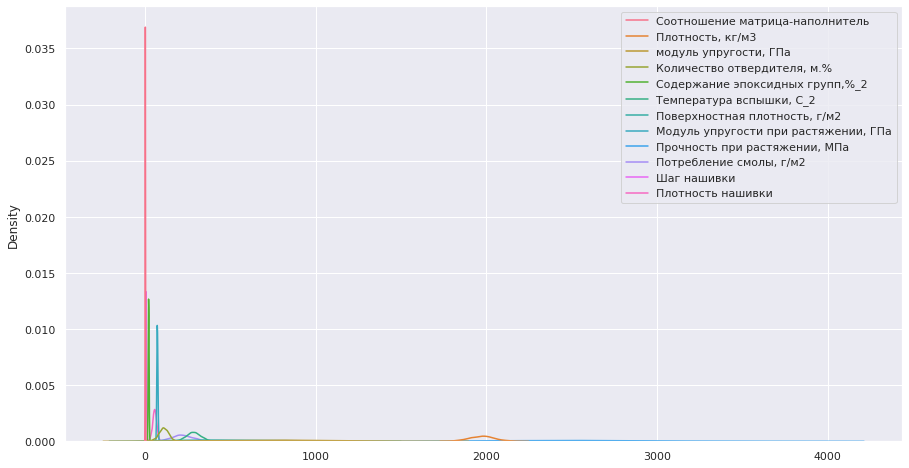

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize = (15,8))
sns.kdeplot(data=ds_Xv.drop(labels='Угол нашивки, град', axis = 1))

Исходя из графиков распределения, диапазоны параметров значительно различаются. Для исключения влияния веса параметра на анализ зависимостей в датасете необходимо провести нормализацию данных.

In [ ]:

#Нормализация с помощью Normalizer - нормализует по строкам, некорректно, не применяем в итоге
norm = Normalizer()
col = ds_Xv.columns
result = norm.fit_transform(ds_Xv)
ds_norm = pd.DataFrame(result, columns=col)
ds_norm








Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
994                         0.000700          0.601520               0.281289   
995                         0.001078          0.641541               0.139172   
996                         0.000953          0.572927               0.121081   
997                         0.001191          0.664389               0.238353   
998                         0.001071          0.531558               0.117343   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
994                     0.026806                         0.006201   
995                     0.045683                         0.006133   
996                     0.032107                         0.006959   
997                     0.045454                         0.006187   
998                     0.036325                         0.007726   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
994                  0.100077                       0.064463   
995                  0.079552                       0.109733   
996                  0.072161                       0.214994   
997                  0.088652                       0.206205   
998                  0.084624                       0.213349   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.018808                       0.806064   
1                                0.018793                       0.805435   
2                                0.018787                       0.805167   
3                                0.018874                       0.808906   
4                                0.019055                       0.816627   
..                                    ...                            ...   
994                              0.022522                       0.735625   
995                              0.022819                       0.738645   
996                              0.021709                       0.773510   
997                              0.023802                       0.665970   
998                              0.020895                       0.803159   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.059111            0.000000     0.001075   
1                   0.059065            0.000000     0.001342   
2                   0.059046            0.000000     0.001342   
3                   0.059320            0.000000     0.001348   
4                   0.059886            0.000000     0.001361   
..                       ...                 ...          ...   
994                 0.038520            0.027733     0.002797   
9

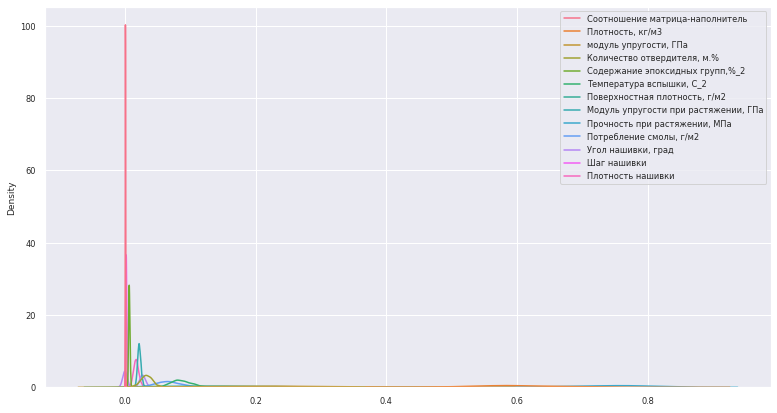

In [ ]:
sns.set(font_scale=0.75)
plt.figure(figsize = (13,7))
sns.kdeplot(data=ds_norm)

# **Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении. **
В целях построения модели используется 70% данных для обучающей выборки,  30% данных резервируется для тестирование модели. 

In [ ]:
#создадим выборку с исключением целевых параметров

ds_train = ds_norm.drop(['Модуль упругости при растяжении, ГПа' , 'Прочность при растяжении, МПа'], axis=1)
ds_train

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
994                         0.000700          0.601520               0.281289   
995                         0.001078          0.641541               0.139172   
996                         0.000953          0.572927               0.121081   
997                         0.001191          0.664389               0.238353   
998                         0.001071          0.531558               0.117343   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
994                     0.026806                         0.006201   
995                     0.045683                         0.006133   
996                     0.032107                         0.006959   
997                     0.045454                         0.006187   
998                     0.036325                         0.007726   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
994                  0.100077                       0.064463   
995                  0.079552                       0.109733   
996                  0.072161                       0.214994   
997                  0.088652                       0.206205   
998                  0.084624                       0.213349   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.059111            0.000000     0.001075   
1                   0.059065            0.000000     0.001342   
2                   0.059046            0.000000     0.001342   
3                   0.059320            0.000000     0.001348   
4                   0.059886            0.000000     0.001361   
..                       ...                 ...          ...   
994                 0.038520            0.027733     0.002797   
995                 0.036842            0.028164     0.003306   
996                 0.068729            0.026143     0.001209   
997                 0.063368            0.028931     0.002029   
998                 0.054762            0.025307     0.001709   

     Плотность нашивки  
0             0.016121  
1             0.012618  
2             0.015298  
3             0.016178  
4             0.019055  
..                 ...  
994           0.014489  
995           0.016820  
996           0.019645  
997           0.018728  
998           0.021773  

[999 rows x 11 columns]

In [ ]:
#Выборка для целевого параметра "Модуль упругости при растяжении"
ds_test = ds_norm[['Модуль упругости при растяжении, ГПа']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ds_train, ds_test, test_size=0.3, random_state=42)

In [ ]:
#Проверяем корректность составления выборки 
X_test


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
453                         0.000717          0.512637               0.085360   
793                         0.000883          0.663631               0.305055   
209                         0.000809          0.616450               0.340459   
309                         0.000999          0.648481               0.122938   
740                         0.000800          0.617434               0.170394   
..                               ...               ...                    ...   
314                         0.000789          0.684828               0.157645   
404                         0.000819          0.580068               0.257960   
7                           0.001035          0.615094               0.416213   
155                         0.001570          0.680514               0.148627   
809                         0.000699          0.554087               0.353384   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
453                     0.032777                         0.005175   
793                     0.053032                         0.007648   
209                     0.028111                         0.007055   
309                     0.041592                         0.006676   
740                     0.040535                         0.008169   
..                           ...                              ...   
314                     0.043898                         0.007283   
404                     0.044871                         0.007083   
7                       0.037784                         0.006224   
155                     0.044448                         0.008290   
809                     0.033553                         0.008317   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
453                  0.059300                       0.148723   
793                  0.102768                       0.176814   
209                  0.081345                       0.251889   
309                  0.098249                       0.249711   
740                  0.103282                       0.108027   
..                        ...                            ...   
314                  0.103874                       0.166607   
404                  0.089124                       0.165919   
7                    0.087871                       0.295831   
155                  0.093197                       0.350805   
809                  0.091884                       0.196730   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
453                 0.045576            0.000000     0.002217   
793                 0.079209            0.031297     0.001749   
209                 0.066547            0.000000     0.000047   
309                 0.093401            0.000000     0.001722   
740                 0.069301            0.028941     0.004300   
..                       ...                 ...          ...   
314                 0.076831            0.000000     0.003376   
404                 0.067230            0.000000     0.001066   
7                   0.087871            0.000000     0.002050   
155                 0.071432            0.000000     0.001908   
809                 0.074891            0.025946     0.002902   

     Плотность нашивки  
453           0.011285  
793           0.023155  
209           0.017453  
309           0.017520  
740           0.015814  
..                 ...  
314           0.020654  
404           0.023747  
7             0.017574  
155           0.023406  
809           0.016155  

[300 rows x 11 columns]

In [ ]:
Y_test

Модуль упругости при растяжении, ГПа
453                              0.019138
793                              0.023808
209                              0.023068
309                              0.022425
740                              0.024408
..                                    ...
314                              0.025231
404                              0.020827
7                                0.022846
155                              0.024205
809                              0.022763

[300 rows x 1 columns]

**Линейная регрессия и ее оценка для модуля упругости при растяжении**

Train MSE: 1.3254228191863698e-06
Test MSE: 1.4503759642419268e-06
Train MAE: 0.0009058839190258026
Test MAE: 0.0009927208671992537
Train r2: 0.8082938141129956
Test r2: 0.7847936099671045


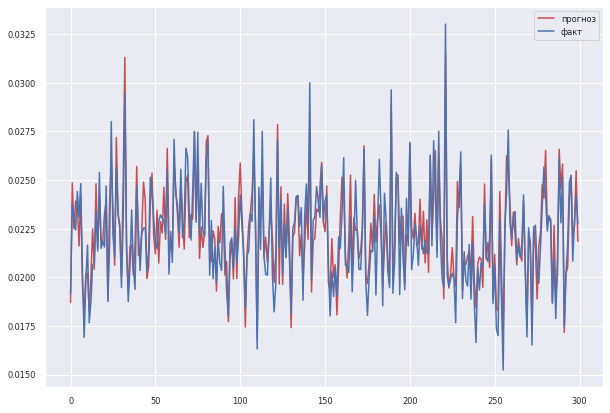

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

#Визуализация результатов


plt.figure(figsize=(10, 7))
plt.plot(test_pred, 'r')
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);


К-ближайших соседей

Train MSE: 1.3293382927689601e-06
Test MSE: 2.0437213596119518e-06
Train MAE: 0.0009177490066298154
Test MAE: 0.0011762433501257634
Train r2: 0.8077274887897901
Test r2: 0.6967531820171244


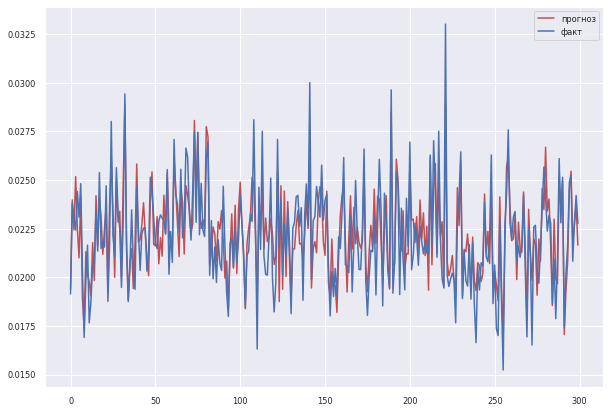

In [ ]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, Y_train)

train_pred = kn.predict(X_train)
test_pred = kn.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = kn.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Случайный лес и оценка алгоритма**

Train MSE: 8.760144576470874e-07
Test MSE: 1.416777209748887e-06
Train MAE: 0.0007344210590915268
Test MAE: 0.0009643488358423987
Train r2: 0.8732952322637039
Test r2: 0.7897789839958501


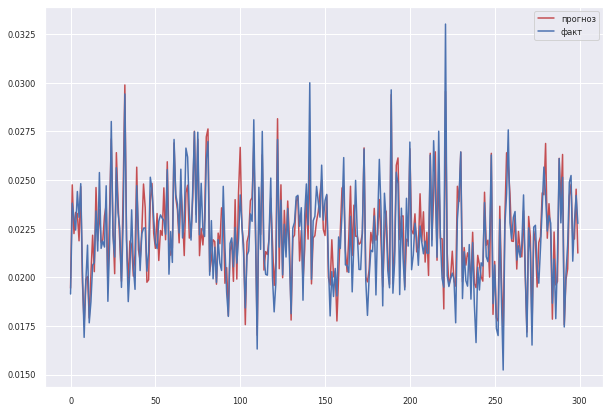

In [ ]:
## Случайный лес
Randf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
Randf.fit(X_train, Y_train.values[:, 0])
train_pred = Randf.predict(X_train)
test_pred = Randf.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Подбор параметров для случайного леса**

In [ ]:
Randf_tuning = RandomForestRegressor(random_state = 42)
param = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,5,7],
   'criterion' :['absolute_error'] #absolute_error=mae
}
GSCV = GridSearchCV(estimator=Randf_tuning, param_grid=param, cv=10, verbose=0)
GSCV.fit(X_train, Y_train.values[:,0])
GSCV.best_params_ 

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

модель случайный лес с подобранными параметрами

Train MSE: 6.140679163200246e-07
Test MSE: 1.4229462060892587e-06
Train MAE: 0.0006065431906704749
Test MAE: 0.0009636603684336383
Train r2: 0.9111825928985011
Test r2: 0.7888636300012523


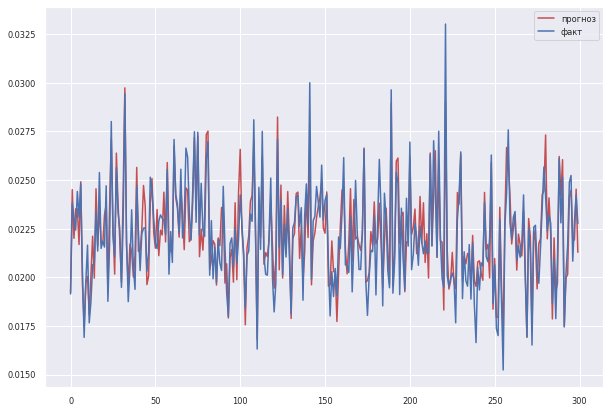

In [ ]:
Randf_best = GSCV.best_estimator_
Randf_best.fit(X_train, Y_train.values[:,0])
train_pred = Randf_best.predict(X_train)
test_pred = Randf_best.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf_best.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Прочность при растяжении**

In [ ]:
#создадим выборку с исключением целевых параметров

ds_train = ds_norm.drop(['Модуль упругости при растяжении, ГПа' , 'Прочность при растяжении, МПа'], axis=1)
ds_train

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
994                         0.000700          0.601520               0.281289   
995                         0.001078          0.641541               0.139172   
996                         0.000953          0.572927               0.121081   
997                         0.001191          0.664389               0.238353   
998                         0.001071          0.531558               0.117343   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
994                     0.026806                         0.006201   
995                     0.045683                         0.006133   
996                     0.032107                         0.006959   
997                     0.045454                         0.006187   
998                     0.036325                         0.007726   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
994                  0.100077                       0.064463   
995                  0.079552                       0.109733   
996                  0.072161                       0.214994   
997                  0.088652                       0.206205   
998                  0.084624                       0.213349   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.059111            0.000000     0.001075   
1                   0.059065            0.000000     0.001342   
2                   0.059046            0.000000     0.001342   
3                   0.059320            0.000000     0.001348   
4                   0.059886            0.000000     0.001361   
..                       ...                 ...          ...   
994                 0.038520            0.027733     0.002797   
995                 0.036842            0.028164     0.003306   
996                 0.068729            0.026143     0.001209   
997                 0.063368            0.028931     0.002029   
998                 0.054762            0.025307     0.001709   

     Плотность нашивки  
0             0.016121  
1             0.012618  
2             0.015298  
3             0.016178  
4             0.019055  
..                 ...  
994           0.014489  
995           0.016820  
996           0.019645  
997           0.018728  
998           0.021773  

[999 rows x 11 columns]

In [ ]:
#Выборка для целевого параметра "Прочность при растяжении"
ds_test = ds_norm[['Прочность при растяжении, МПа']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ds_train, ds_test, test_size=0.3, random_state=42)

In [ ]:
#Проверяем корректность составления выборки 
X_test


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
453                         0.000717          0.512637               0.085360   
793                         0.000883          0.663631               0.305055   
209                         0.000809          0.616450               0.340459   
309                         0.000999          0.648481               0.122938   
740                         0.000800          0.617434               0.170394   
..                               ...               ...                    ...   
314                         0.000789          0.684828               0.157645   
404                         0.000819          0.580068               0.257960   
7                           0.001035          0.615094               0.416213   
155                         0.001570          0.680514               0.148627   
809                         0.000699          0.554087               0.353384   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
453                     0.032777                         0.005175   
793                     0.053032                         0.007648   
209                     0.028111                         0.007055   
309                     0.041592                         0.006676   
740                     0.040535                         0.008169   
..                           ...                              ...   
314                     0.043898                         0.007283   
404                     0.044871                         0.007083   
7                       0.037784                         0.006224   
155                     0.044448                         0.008290   
809                     0.033553                         0.008317   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
453                  0.059300                       0.148723   
793                  0.102768                       0.176814   
209                  0.081345                       0.251889   
309                  0.098249                       0.249711   
740                  0.103282                       0.108027   
..                        ...                            ...   
314                  0.103874                       0.166607   
404                  0.089124                       0.165919   
7                    0.087871                       0.295831   
155                  0.093197                       0.350805   
809                  0.091884                       0.196730   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
453                 0.045576            0.000000     0.002217   
793                 0.079209            0.031297     0.001749   
209                 0.066547            0.000000     0.000047   
309                 0.093401            0.000000     0.001722   
740                 0.069301            0.028941     0.004300   
..                       ...                 ...          ...   
314                 0.076831            0.000000     0.003376   
404                 0.067230            0.000000     0.001066   
7                   0.087871            0.000000     0.002050   
155                 0.071432            0.000000     0.001908   
809                 0.074891            0.025946     0.002902   

     Плотность нашивки  
453           0.011285  
793           0.023155  
209           0.017453  
309           0.017520  
740           0.015814  
..                 ...  
314           0.020654  
404           0.023747  
7             0.017574  
155           0.023406  
809           0.016155  

[300 rows x 11 columns]

In [ ]:
Y_test

Прочность при растяжении, МПа
453                       0.837021
793                       0.643024
209                       0.654146
309                       0.693569
740                       0.747790
..                             ...
314                       0.677239
404                       0.744259
7                         0.585803
155                       0.612188
809                       0.716029

[300 rows x 1 columns]

**Линейная регрессия и ее оценка для прочности при растяжении**

Train MSE: 0.00024410588134766767
Test MSE: 0.00022764943530784577
Train MAE: 0.011809110326302634
Test MAE: 0.011795162967694053
Train r2: 0.9562921139380618
Test r2: 0.9540876556284416


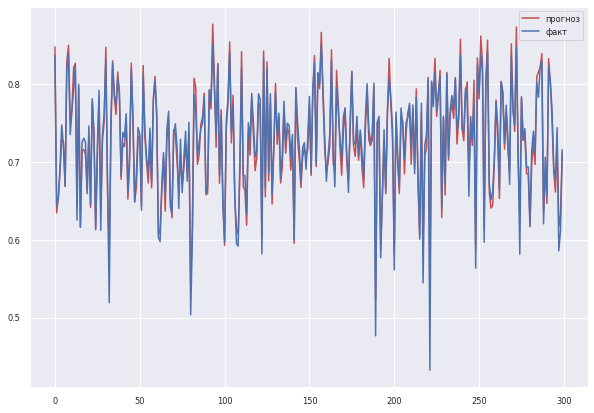

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

#Визуализация результатов


plt.figure(figsize=(10, 7))
plt.plot(test_pred, 'r')
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);


**К-ближайших соседей и оценка алгоритма для прочности при растяжении**

Train MSE: 0.0001657581139155418
Test MSE: 0.00026342234400394813
Train MAE: 0.008080506854301598
Test MAE: 0.009698972991586364
Train r2: 0.9703205153564338
Test r2: 0.9468729744191219


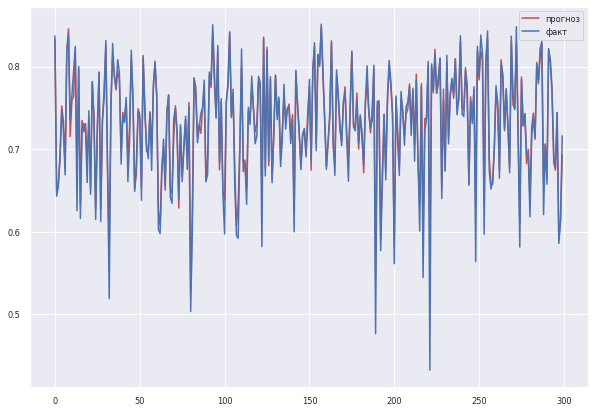

In [ ]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, Y_train)

train_pred = kn.predict(X_train)
test_pred = kn.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = kn.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Случайный лес и оценка алгоритма для прочности при растяжении**

Train MSE: 3.543661017428947e-05
Test MSE: 0.00018736629862471988
Train MAE: 0.0034919027741742784
Test MAE: 0.00813681519810555
Train r2: 0.9936549692642874
Test r2: 0.9622119597421821


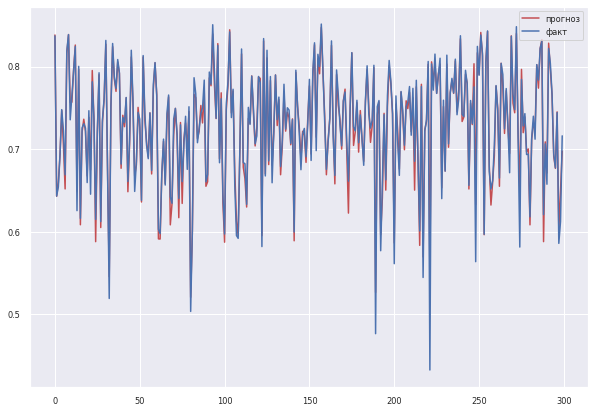

In [ ]:
## Случайный лес
Randf = RandomForestRegressor(n_estimators=50, max_depth=18)
Randf.fit(X_train, Y_train.values[:, 0])
train_pred = Randf.predict(X_train)
test_pred = Randf.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

**Подбор параметров случайного леса для прочности при растяжении**

In [ ]:
Randf_tuning = RandomForestRegressor(random_state = 42)
param = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,5,7],
   'criterion' :['absolute_error'] #absolute_error=mae
}
GSCV = GridSearchCV(estimator=Randf_tuning, param_grid=param, cv=10, verbose=0)
GSCV.fit(X_train, Y_train.values[:,0])
GSCV.best_params_ 

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 50}

модель случайный лес с подобранными параметрами

Train MSE: 6.24663597979736e-05
Test MSE: 0.0002338972466449179
Train MAE: 0.005564764195527404
Test MAE: 0.0099656938897505
Train r2: 0.9888152119822738
Test r2: 0.9528275968662124


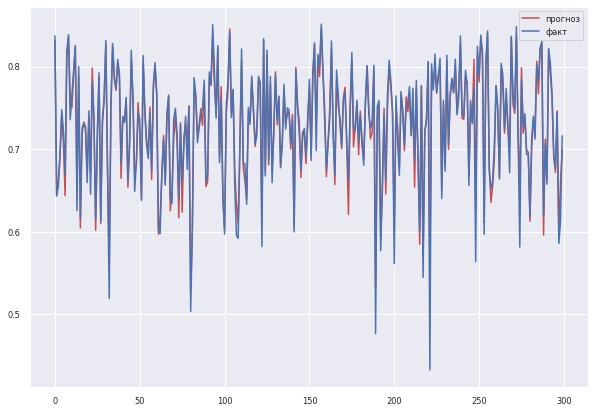

In [ ]:
Randf_best = GSCV.best_estimator_
Randf_best.fit(X_train, Y_train.values[:,0])
train_pred = Randf_best.predict(X_train)
test_pred = Randf_best.predict(X_test)
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)


print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Train r2:', train_r2)
print('Test r2:', test_r2)

y_pred_rf = Randf_best.predict(X_test)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_rf, "r")
plt.plot(Y_test.values)
plt.legend(['прогноз', 'факт'], loc=1)
plt.grid(True);

# **Нейронная сеть, рекомендующая соотношение матрица-наполнитель**

In [ ]:
input_columns_names = ["Модуль упругости при растяжении, ГПа",
                      "Прочность при растяжении, МПа",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_columns_names = ["Соотношение матрица-наполнитель"]
                    
x = ds_norm[input_columns_names]
y = ds_norm[output_columns_names]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
x_train

Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
728                              0.024190                       0.709588   
630                              0.020072                       0.754944   
394                              0.025952                       0.722883   
777                              0.023634                       0.644198   
598                              0.022842                       0.747604   
..                                    ...                            ...   
106                              0.022630                       0.775952   
270                              0.022078                       0.667343   
860                              0.021062                       0.770269   
435                              0.019362                       0.788651   
102                              0.021250                       0.707442   

     Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
728          0.607168               0.282262                     0.037797   
630          0.525884               0.370204                     0.020184   
394          0.653130               0.147569                     0.028035   
777          0.682938               0.245852                     0.043947   
598          0.584895               0.219258                     0.029409   
..                ...                    ...                          ...   
106          0.570060               0.244190                     0.045544   
270          0.626932               0.337029                     0.037358   
860          0.593897               0.126368                     0.035457   
435          0.495660               0.214538                     0.027152   
102          0.582723               0.319120                     0.033372   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
728                         0.006401                  0.064410   
630                         0.007347                  0.089400   
394                         0.006667                  0.087250   
777                         0.008734                  0.094061   
598                         0.006041                  0.106617   
..                               ...                       ...   
106                         0.006644                  0.086120   
270                         0.006558                  0.097720   
860                         0.005560                  0.065235   
435                         0.006470                  0.069273   
102                         0.008232                  0.079248   

     Поверхностная плотность, г/м2  Потребление смолы, г/м2  \
728                       0.193479                 0.057159   
630                       0.033644                 0.074688   
394                       0.111261                 0.084868   
777                       0.188295                 0.098115   
598                       0.183378                 0.058749   
..                             ...                      ...   
106                       0.027177                 0.047714   
270                       0.183108                 0.049104   
860                       0.161890                 0.069772   
435                       0.275766                 0.061774   
102                       0.206733                 0.083345   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
728            0.028591     0.001110           0.020877  
630            0.025166     0.002152           0.015761  
394            0.000000     0.002295           0.019454  
777            0.031441     0.002352           0.025890  
598            0.027230     0.001331           0.017308  
..                  ...          ...                ...  
106            0.000000     0.002009           0.015271  
270            0.000000     0.000295           0.024597  
860            0.026491     0.001270           0.015300  
435            0.000000     0.002047 

In [ ]:
y_train

Соотношение матрица-наполнитель
728                         0.000926
630                         0.000772
394                         0.001310
777                         0.001082
598                         0.000686
..                               ...
106                         0.001103
270                         0.000794
860                         0.000935
435                         0.000679
102                         0.001518

[699 rows x 1 columns]

In [ ]:
x_train.describe().T.round(2)

count  mean   std   min   25%   50%  \
Модуль упругости при растяжении, ГПа  699.0  0.02  0.00  0.02  0.02  0.02   
Прочность при растяжении, МПа         699.0  0.73  0.07  0.43  0.69  0.74   
Плотность, кг/м3                      699.0  0.60  0.07  0.42  0.55  0.59   
модуль упругости, ГПа                 699.0  0.22  0.10  0.00  0.15  0.22   
Количество отвердителя, м.%           699.0  0.03  0.01  0.01  0.03  0.03   
Содержание эпоксидных групп,%_2       699.0  0.01  0.00  0.00  0.01  0.01   
Температура вспышки, С_2              699.0  0.09  0.02  0.05  0.08  0.08   
Поверхностная плотность, г/м2         699.0  0.14  0.08  0.00  0.08  0.14   
Потребление смолы, г/м2               699.0  0.07  0.02  0.01  0.05  0.07   
Угол нашивки, град                    699.0  0.01  0.01  0.00  0.00  0.02   
Шаг нашивки                           699.0  0.00  0.00  0.00  0.00  0.00   
Плотность нашивки                     699.0  0.02  0.00  0.01  0.01  0.02   

                                       75%   max  
Модуль упругости при растяжении, ГПа  0.02  0.03  
Прочность при растяжении, МПа         0.78  0.88  
Плотность, кг/м3                      0.64  0.85  
модуль упругости, ГПа                 0.29  0.52  
Количество отвердителя, м.%           0.04  0.07  
Содержание эпоксидных групп,%_2       0.01  0.01  
Температура вспышки, С_2              0.10  0.14  
Поверхностная плотность, г/м2         0.20  0.41  
Потребление смолы, г/м2               0.08  0.13  
Угол нашивки, град                    0.03  0.04  
Шаг нашивки                           0.00  0.00  
Плотность нашивки                     0.02  0.03

**Построение многослойного перцептрона**

In [ ]:

model = keras.Sequential(
    [
    layers.Dense(64, activation = 'relu', input_dim=12),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1),
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_error')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                832       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_split = 0.3)

Epoch 1/50
16/16 [==============================] - 1s 19ms/step - loss: 0.0180 - val_loss: 0.0041
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 8.1850e-04
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0041
Epoch 8/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0038
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0036
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 11/50
16

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
score

0.0039653838612139225

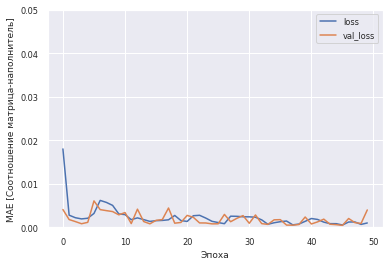

In [ ]:
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.05])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [Соотношение матрица-наполнитель]')
    plt.legend()
    plt.grid(True)

In [ ]:
model.save('/content/drive/MyDrive/VKR/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/VKR/model/assets


In [ ]:
model2 = keras.models.load_model('/content/drive/MyDrive/VKR/model')

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                832       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________
